# Introduction

The IHDI dataset below (Inequality-Adjusted Human Development Index) was sourced from Kaggle.com. The index captures the Human Development Index (HDI) of the average person in society, which is less than the aggregate HDI where there is inequality in the distribution of health, education and income. Under perfect equality, the HDI and Inequality-Adjusted Human Development Index (IHDI) are equal; the greater the difference between the two, the greater the inequality. 

The IHDI, estimated for 151 countries (which includes the world and other 150 specific countries), captures the losses in human development due to inequality in health, education and income. Losses in all three dimensions vary across countries, ranging from a few percent (Czech Republic, Slovenia) up to more than 40% (Comoros, Central African Republic). (https://www.kaggle.com/datasets/elmartini/inequalityadjusted-human-development-index)

In order to supplement this dataset, I accessed the OECD iLibrary and was able to source additional, complementary data. The Better Life Index (https://www.oecd-ilibrary.org/social-issues-migration-health/data/better-life-index/better-life-index-2015_data-00823-en?parentId=http%3A%2F%2Finstance.metastore.ingenta.com%2Fcontent%2Fcollection%2Fsocwel-data-en) allows for comparison of well-being across coutnries, based on 11 topics the OECD has identified as being essential, in the areas of material living conditions and quality of life. The format of the BLI dataframe was atypical. I cleaned and reformatted the dataframe in Excel to remove three additional stacked and nested headers, before importing it into Jupyter Notebook.

I sought to use the cross-section between these two datasets to understand how rates of Human Development Index related to the OECD definition of a Better Life, and sought to undertake a projection using machine learning to understand how OECD countries' HDI might change over time. 


In [90]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Unrestricting column width
pd.set_option('max_colwidth', None)

# 2. Importing

In [144]:
# Milestone 2.1 - Import data from a flat file (.csv)
# Milestone 3.1 - Create pandas dataframe

IHDI = pd.read_csv("IHDI.csv")
BLI = pd.read_csv("BLI.csv")


In [93]:
# Printing dataframe to check column names
IHDI.info()
BLI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         153 non-null    object 
 1   Country      153 non-null    object 
 2   IHDI         153 non-null    float64
 3   HDI          153 non-null    float64
 4   Loss%        153 non-null    float64
 5   Growth_2010  143 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           40 non-null     object 
 1   Dwellings without basic facilities (Percentage)                   40 non-null     float64
 2   Housing expenditure 

I attempted to source the OECD Better Life Index data using an API request, however I was not permitted access.

Instead, I sourced API from Neurovault API to indicate the skills and knowledge required to use requests and get an API from a website. 

In [94]:
import requests

In [95]:
# Milestone 2.2 - Retrieve data using online APIs
# Get data from Neurovault API
# Check status code - 404 relates to a dead link; 200 relates to a live link
request = requests.get("https://neurovault.org/api/atlases/?")
print(request.status_code)

200


In [96]:
# Checking validity of source code
print(request.text)

{"count":18,"next":null,"previous":null,"results":[{"url":"https://neurovault.org/images/14228/","id":14228,"file":"https://neurovault.org/media/images/1056/Thalamus-maxprob-thr25-2mm.nii.gz","collection":"https://neurovault.org/collections/1056/","collection_id":1056,"file_size":2396,"label_description_file":"https://neurovault.org/media/images/1056/Thalamus-maxprob-thr25-2mm.xml","name":"Thalamus maxprob thr25 2mm","description":"FSL3.3","add_date":"2016-01-21T17:22:24.571965Z","modify_date":"2018-06-30T04:07:04.650885Z","is_valid":true,"surface_left_file":"https://neurovault.org/media/images/1056/14228.L.func.gii","surface_right_file":"https://neurovault.org/media/images/1056/14228.R.func.gii","data_origin":"volume","target_template_image":"GenericMNI","subject_species":"homo sapiens","figure":null,"handedness":null,"age":null,"gender":null,"race":null,"ethnicity":null,"BMI":null,"fat_percentage":null,"waist_hip_ratio":null,"mean_PDS_score":null,"tanner_stage":null,"days_since_menst

In [97]:
# Converting API into JSON text file
atlas = request.json()

In [98]:
# Milestone 4.1 - Looping - print all modification dates contained in the list of results stored in the API. 
# Print file from the list of results
for r in atlas['results']:
    print(r['modify_date'])

2018-06-30T04:07:04.650885Z
2018-06-30T04:07:04.705398Z
2018-06-30T04:09:18.645496Z
2018-06-30T04:18:35.105101Z
2016-01-21T17:22:27.881853Z
2016-01-21T17:22:27.892152Z
2018-06-30T04:23:10.345825Z
2016-01-21T17:23:06.660320Z
2016-01-21T17:22:07.618034Z
2016-01-21T17:23:06.691374Z
2016-01-21T17:23:06.701609Z
2016-01-21T17:22:09.337998Z
2016-01-21T17:23:06.968216Z
2018-06-30T04:23:13.290634Z
2018-06-30T04:43:55.198591Z
2018-06-30T04:43:56.793618Z
2018-06-30T05:02:15.058920Z
2018-06-30T05:02:15.105432Z


# 3. Preparation

I noticed that a considerable number of rows had been dropped. I went to investigate in the original CSV/Excel files for both IHDI and BLI by using a VLOOKUP function on both spreadsheets. I found that the commonality between the two spreadsheets had all been included when the files were merged. 

In [99]:
# Milestone 3.4 - Merging Inequality Adjusted Human Development Index and Better Life Index Dataframes
# Checking information contained in the dataset
data = pd.merge(right=IHDI, left=BLI, on='Country')

In [100]:
# Show statistics of dataset 
data.describe()

,Dwellings without basic facilities (Percentage),Housing expenditure (Percentage),"Rooms per person, Ratio","Household net adjusted disposable income, US Dollar","Household net wealth, US Dollar","Labour market insecurity, Percentage","Employment rate, Percentage","Long-term unemployment rate, Percentage","Personal earnings, US Dollar","Quality of support network, Percentage",...,"Self-reported health, Percentage","Life satisfaction, Average score","Feeling safe walking alone at night, Percentage","Homicide rate, Ratio","Employees working very long hours, Percentage","Time devoted to leisure and personal care, Hours",IHDI,HDI,Loss%,Growth_2010
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,38.000000
mean,4.061538,18.353846,1.546154,25485.948718,231602.282051,4.443590,68.051282,2.097436,38217.051282,91.282051,...,65.205128,6.628205,72.461538,3.182051,6.625641,8.125641,0.801769,0.892051,10.564103,0.035421
std,7.569072,6.617713,0.609938,13651.619096,216679.141251,4.427474,8.798770,3.211778,19863.112130,5.015496,...,19.715315,0.730518,13.997831,6.307300,6.862511,7.634710,0.098380,0.060013,6.208461,0.022987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,77.000000,...,0.000000,4.900000,40.000000,0.200000,0.000000,0.000000,0.468000,0.709000,4.400000,0.004000
25%,0.100000,18.250000,1.200000,20287.000000,0.000000,2.250000,65.000000,0.750000,27808.500000,89.000000,...,60.000000,6.100000,66.500000,0.500000,1.900000,0.000000,0.783000,0.863000,7.000000,0.021000
50%,0.500000,20.000000,1.700000,27155.000000,230032.000000,3.300000,70.000000,1.200000,39322.000000,93.000000,...,70.000000,6.700000,76.000000,0.900000,4.300000,14.400000,0.826000,0.916000,8.200000,0.032000
75%,5.300000,21.550000,1.900000,34652.500000,306977.000000,5.200000,74.000000,2.250000,54036.000000,95.000000,...,75.500000,7.250000,81.500000,1.700000,9.050000,15.000000,0.868000,0.935000,11.800000,0.049750
max,35.900000,27.400000,2.600000,51147.000000,941162.000000,21.700000,80.000000,17.900000,69392.000000,98.000000,...,89.000000,7.900000,93.000000,26.800000,27.000000,16.500000,0.899000,0.957000,34.000000,0.119000


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           39 non-null     object 
 1   Dwellings without basic facilities (Percentage)                   39 non-null     float64
 2   Housing expenditure (Percentage)                                  39 non-null     float64
 3   Rooms per person, Ratio                                           39 non-null     float64
 4   Household net adjusted disposable income, US Dollar               39 non-null     int64  
 5   Household net wealth, US Dollar                                   39 non-null     int64  
 6   Labour market insecurity, Percentage                              39 non-null     float64
 7   Employment rate, Percentage          

In [102]:
# Check missing values
data.isnull().sum()

Country                                                             0
Dwellings without basic facilities (Percentage)                     0
Housing expenditure (Percentage)                                    0
Rooms per person, Ratio                                             0
Household net adjusted disposable income, US Dollar                 0
Household net wealth, US Dollar                                     0
Labour market insecurity, Percentage                                0
Employment rate, Percentage                                         0
Long-term unemployment rate, Percentage                             0
Personal earnings, US Dollar                                        0
Quality of support network, Percentage                              0
Educational attainment, Percentage                                  0
Student skills, Average score                                       0
Years in education, Years                                           0
Air pollution, Micro

In [103]:
# Milestone 3.2 - Sorting by Country name
data = data.sort_values(by=['Country'])
data.head()

,Country,Dwellings without basic facilities (Percentage),Housing expenditure (Percentage),"Rooms per person, Ratio","Household net adjusted disposable income, US Dollar","Household net wealth, US Dollar","Labour market insecurity, Percentage","Employment rate, Percentage","Long-term unemployment rate, Percentage","Personal earnings, US Dollar",...,"Life satisfaction, Average score","Feeling safe walking alone at night, Percentage","Homicide rate, Ratio","Employees working very long hours, Percentage","Time devoted to leisure and personal care, Hours",Rank,IHDI,HDI,Loss%,Growth_2010
0,Australia,0.0,19.4,0.0,37433,528768,3.1,73,1.0,55206,...,7.1,67,0.9,12.5,14.4,11,0.867,0.944,8.2,0.011
1,Austria,0.8,20.8,1.6,37001,309637,2.3,72,1.3,53132,...,7.2,86,0.5,5.3,14.5,15,0.857,0.922,7.0,0.021
2,Belgium,0.7,20.0,2.1,34884,447607,2.4,65,2.3,54327,...,6.8,56,1.1,4.3,15.5,13,0.859,0.931,7.7,0.026
36,Brazil,6.7,0.0,0.0,0,0,0.0,57,0.0,0,...,6.1,45,19.0,5.6,0.0,88,0.570,0.765,25.5,0.041
3,Canada,0.2,22.9,2.6,34421,478240,3.8,70,0.5,55342,...,7.0,78,1.2,3.3,14.6,17,0.848,0.929,8.7,0.025


Finland had the highest life satisfaction score, followed by Iceland and Switzerland. We will use this as a basis of considering quality of life and Better Life Index indicators in the graphing, modelling and projections in section 5 below.

In [104]:
# Milestone 3.2 - Sorting by highest life satisfaction score.
data = data.sort_values(by=['Life satisfaction, Average score'], ascending=False)
data.head()

,Country,Dwellings without basic facilities (Percentage),Housing expenditure (Percentage),"Rooms per person, Ratio","Household net adjusted disposable income, US Dollar","Household net wealth, US Dollar","Labour market insecurity, Percentage","Employment rate, Percentage","Long-term unemployment rate, Percentage","Personal earnings, US Dollar",...,"Life satisfaction, Average score","Feeling safe walking alone at night, Percentage","Homicide rate, Ratio","Employees working very long hours, Percentage","Time devoted to leisure and personal care, Hours",Rank,IHDI,HDI,Loss%,Growth_2010
9,Finland,0.4,23.1,1.9,33471,230032,2.2,72,1.2,46230,...,7.9,88,1.2,3.6,15.2,4,0.888,0.938,5.3,0.040
14,Iceland,0.0,0.0,1.6,0,0,1.0,78,0.7,67488,...,7.6,85,0.3,11.7,0.0,2,0.894,0.949,5.8,0.055
32,Switzerland,0.0,21.4,1.9,39697,0,0.0,80,1.7,64824,...,7.5,86,0.3,0.4,0.0,3,0.889,0.955,6.9,0.015
23,Netherlands,0.1,19.6,2.0,34984,248599,2.5,78,0.9,58828,...,7.5,83,0.6,0.3,15.5,8,0.878,0.944,7.0,0.036
7,Denmark,0.5,23.3,1.9,33774,149864,4.5,74,0.9,58430,...,7.5,85,0.5,1.1,0.0,6,0.883,0.940,6.1,0.025


In [105]:
# Milestone 3.2 - Indexing
data.loc[:,['Country', 'Life satisfaction, Average score', 'Feeling safe walking alone at night, Percentage']]

,Country,"Life satisfaction, Average score","Feeling safe walking alone at night, Percentage"
9,Finland,7.9,88
14,Iceland,7.6,85
32,Switzerland,7.5,86
23,Netherlands,7.5,83
7,Denmark,7.5,85
21,Luxembourg,7.4,87
31,Sweden,7.3,79
25,Norway,7.3,93
24,New Zealand,7.3,66
11,Germany,7.3,76


No duplicates were dropped from the dataframe, as the rows related to single geographical areas only. There were no duplicates to drop. 

In [106]:
# Milestone 3.3 - Drop duplicates
data = data.drop_duplicates(subset=['Country'], keep = 'first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 9 to 33
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           39 non-null     object 
 1   Dwellings without basic facilities (Percentage)                   39 non-null     float64
 2   Housing expenditure (Percentage)                                  39 non-null     float64
 3   Rooms per person, Ratio                                           39 non-null     float64
 4   Household net adjusted disposable income, US Dollar               39 non-null     int64  
 5   Household net wealth, US Dollar                                   39 non-null     int64  
 6   Labour market insecurity, Percentage                              39 non-null     float64
 7   Employment rate, Percentage          

In [107]:
# Milestone 3.3 - Replace missing values
data['Growth_2010']= data['Growth_2010'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 9 to 33
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           39 non-null     object 
 1   Dwellings without basic facilities (Percentage)                   39 non-null     float64
 2   Housing expenditure (Percentage)                                  39 non-null     float64
 3   Rooms per person, Ratio                                           39 non-null     float64
 4   Household net adjusted disposable income, US Dollar               39 non-null     int64  
 5   Household net wealth, US Dollar                                   39 non-null     int64  
 6   Labour market insecurity, Percentage                              39 non-null     float64
 7   Employment rate, Percentage          

# Section 4 - Analysis

Section 4 of the Project involved analysing the merged, cleaned and organised dataset. 

In [108]:
# Milestone 4.1 - looping, replace blank spaces with 0
for col in data:
    data[col].replace("XX","0",inplace=True)
    print(data)

           Country  Dwellings without basic facilities (Percentage)  \
9          Finland                                              0.4   
14         Iceland                                              0.0   
32     Switzerland                                              0.0   
23     Netherlands                                              0.1   
7          Denmark                                              0.5   
21      Luxembourg                                              0.1   
31          Sweden                                              0.0   
25          Norway                                              0.0   
24     New Zealand                                              0.0   
11         Germany                                              0.1   
1          Austria                                              0.8   
16          Israel                                              0.0   
0        Australia                                              0.0   
15    

In [109]:
# Milestone 4.1 - Groupby mean, median, standard deviation
data.groupby(['Country']).agg(['mean','median','std'])

Dwellings without basic facilities (Percentage)             \
                                                          mean median std   
Country                                                                     
Australia                                                  0.0    0.0 NaN   
Austria                                                    0.8    0.8 NaN   
Belgium                                                    0.7    0.7 NaN   
Brazil                                                     6.7    6.7 NaN   
Canada                                                     0.2    0.2 NaN   
Chile                                                      9.4    9.4 NaN   
Colombia                                                  12.3   12.3 NaN   
Czech Republic                                             0.5    0.5 NaN   
Denmark                                                    0.5    0.5 NaN   
Estonia                                                    5.7    5.7 NaN   
Finland                                                    0.4    0.4 NaN   
France                                                     0.5    0.5 NaN   
Germany                                                    0.1    0.1 NaN   
Greece                                                     0.4    0.4 NaN   
Hungary                                                    3.5    3.5 NaN   
Iceland                                                    0.0    0.0 NaN   
Ireland                                                    0.2    0.2 NaN   
Israel                                                     0.0    0.0 NaN   
Italy                                                      0.6    0.6 NaN   
Japan                                                      6.4    6.4 NaN   
Latvia                                                    11.2   11.2 NaN   
Lithuania                                                 11.8   11.8 NaN   
Luxembourg                                                 0.1    0.1 NaN   
Mexico                                                    25.9   25.9 NaN   
Netherlands                                                0.1    0.1 NaN   
New Zealand                                                0.0    0.0 NaN   
Norway                                                     0.0    0.0 NaN   
Poland                                                     2.3    2.3 NaN   
Portugal                                                   0.9    0.9 NaN   
Russia                                                    13.8   13.8 NaN   
Slovakia                                                   1.5    1.5 NaN   
Slovenia                                                   0.2    0.2 NaN   
South Africa                                              35.9   35.9 NaN   
Spain                                                      0.3    0.3 NaN   
Sweden                                                     0.0    0.0 NaN   
Switzerland                                                0.0    0.0 NaN   
Turkey                                                     4.9    4.9 NaN   
United Kingdom                                             0.5    0.5 NaN   
United States                                              0.1    0.1 NaN   

               Housing expenditure (Percentage)             \
                                           mean median std   
Country                                                      
Australia                                  19.4   19.4 NaN   
Austria                                    20.8   20.8 NaN   
Belgium                                    20.0   20.0 NaN   
Brazil                                      0.0    0.0 NaN   
Canada                                     22.9   22.9 NaN   
Chile                                      18.4   18.4 NaN   
Colombia                                    0.0    0.0 NaN   
Czech Republic                             23.4   23.4 NaN   
Denmark                                    23.3   23.3 NaN   
Estonia                             

In [110]:
# Milestone 4.1 - Conditional statement

data.loc[data['Life expectancy, Years'] <70, 'high life expectancy'] = 'False'
data.loc[data['Life expectancy, Years'] >=70, 'high life expectancy'] = 'True'

In [111]:
# Milestone 4.2 - Define a custom function to create reusable code
def square(a):
    a_sqrd = a*a
    return a_sqrd
print(square(3))

9


In [112]:
# Milestone 4.2 - Lists; numpy

grouping = data.groupby(['Life satisfaction, Average score'])

ratio = {(data['Time devoted to leisure and personal care, Hours'].max() - data['Life expectancy, Years'].min()/data['Life satisfaction, Average score']).max() - data['Years in education, Years'].min()}
print(ratio)

{8.373417721518987}


In [113]:
# Milestone 4.3 - use NumPy functions
# Calculating the cost of the number of rooms per person, by the household net adjusted disposable income
adj_disp_income = data['Household net adjusted disposable income, US Dollar']
rooms_pp = data['Rooms per person, Ratio']
cost_room_pp = adj_disp_income/rooms_pp
for val in cost_room_pp:
    print(val)

17616.315789473683
0.0
20893.157894736843
17492.0
17775.78947368421
22386.5
19841.176470588234
18640.0
16260.0
21650.555555555555
23125.625
0.0
inf
14041.904761904761
21311.25
13238.846153846154
17776.0
16524.5
16611.428571428572
19097.222222222223
19226.363636363636
21022.14285714286
13990.588235294117
14292.105263157895
15781.25
17984.0
16485.833333333336
0.0
21522.727272727272
nan
15195.789473684212
14789.999999999998
15018.57142857143
14633.529411764706
17325.833333333336
0.0
19546.0
inf
0.0


In [199]:
# # Milestone 4.3 - use Numpy functions
# Calculating the relationship between how safe people feel walking home at night and the homicide rate. 
safe_walk = data['Feeling safe walking alone at night, Percentage']
homicide = data['Homicide rate, Ratio']
walk_homicide = safe_walk/homicide
for val in walk_homicide:
    print(val)

155.0
283.33333333333337
286.6666666666667
73.33333333333334
152.0
170.0
71.81818181818181
138.33333333333334
227.5
190.0
74.44444444444444
110.0
50.90909090909091
50.76923076923077
172.0
390.0
65.0
385.0
41.578947368421055
435.0
185.0
53.333333333333336
142.0
13.0
95.0
69.0
82.22222222222221
24.8
114.28571428571429
146.0
19.45945945945946
118.57142857142858
13.333333333333334
17.083333333333336
59.0
1.5671641791044775
2.1645021645021645
2.3684210526315788
2.9197080291970803


# 5. Visualisation

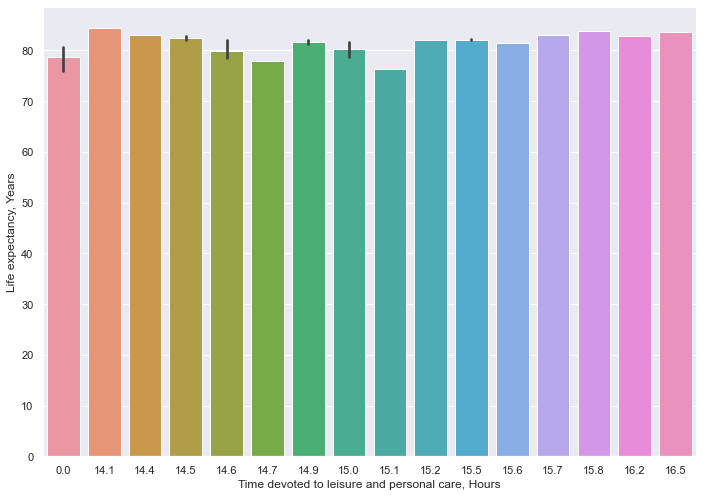

In [115]:
# Charting the relationship between time devoted to leisure and personal care and life expectancy. Across OECD
leisure_personal_care = data['Time devoted to leisure and personal care, Hours']
life_expect = data['Life expectancy, Years']

sns.barplot(x=data['Time devoted to leisure and personal care, Hours'], y=data['Life expectancy, Years'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

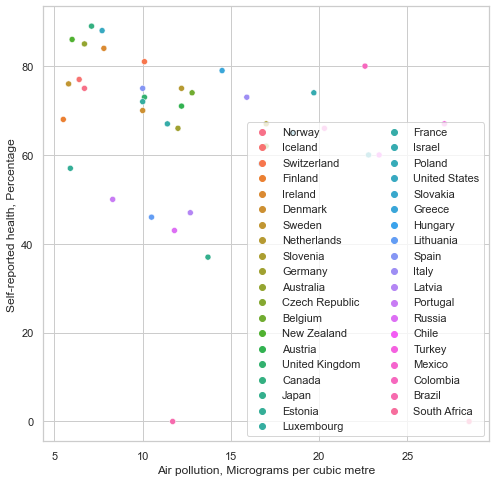

In [198]:
health = data['Self-reported health, Percentage']
air_pollution = data['Air pollution, Micrograms per cubic metre']
country = data['Country']

ax = sns.scatterplot(x=air_pollution, y=health, hue=country)
ax.legend(bbox_to_anchor=(1.02,0.15),
         loc='lower left',  borderaxespad=0)
plt.legend(ncol=2)
plt.show()

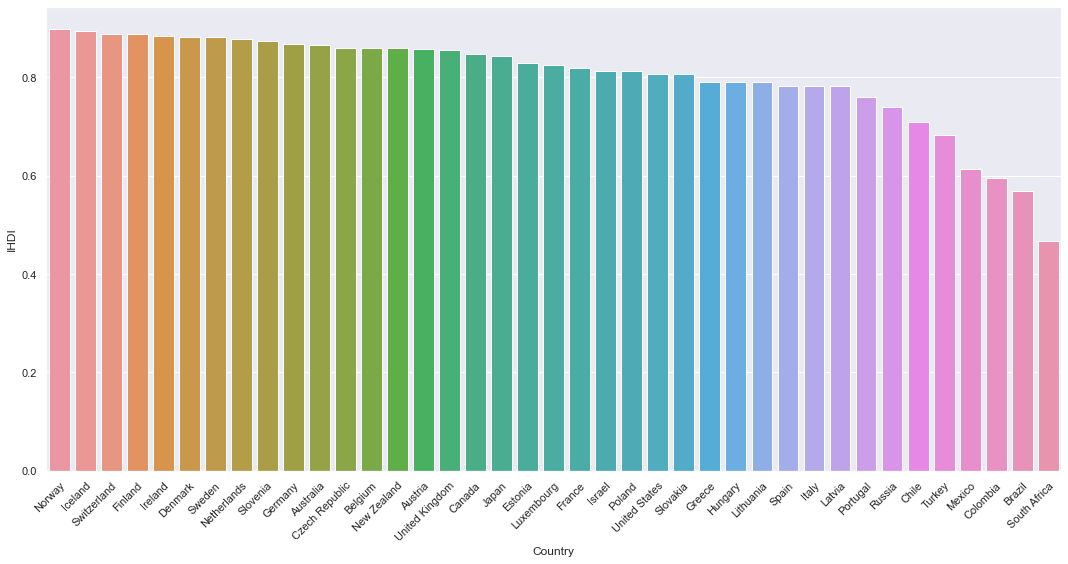

In [139]:
data = data.sort_values(by=['IHDI'], ascending=False)

ax = sns.barplot(x="Country", y="IHDI", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
sns.set(rc = {'figure.figsize':(8,8)})
plt.tight_layout()
plt.show()

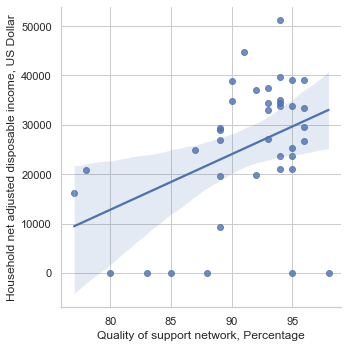

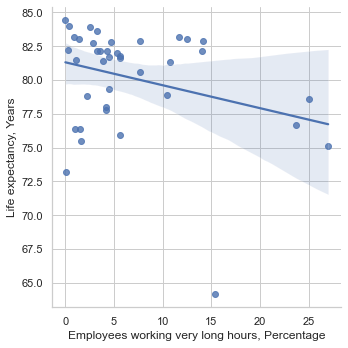

In [230]:
sns.lmplot(data=data, x='Quality of support network, Percentage', y='Household net adjusted disposable income, US Dollar')
sns.lmplot(data=data, x='Employees working very long hours, Percentage', y='Life expectancy, Years')

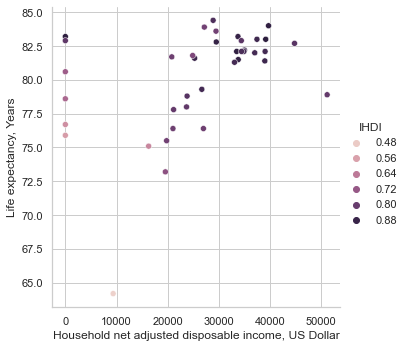

In [228]:
sns.relplot(x="Household net adjusted disposable income, US Dollar", y="Life expectancy, Years", sizes=(5,200), hue="IHDI", data=data)